In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e3/sample_submission.csv
/kaggle/input/playground-series-s5e3/train.csv
/kaggle/input/playground-series-s5e3/test.csv


In [2]:
train=pd.read_csv('/kaggle/input/playground-series-s5e3/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s5e3/test.csv')

In [3]:
print(train.shape)
print(test.shape)

(2190, 13)
(730, 12)


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             730 non-null    int64  
 1   day            730 non-null    int64  
 2   pressure       730 non-null    float64
 3   maxtemp        730 non-null    float64
 4   temparature    730 non-null    float64
 5   mintemp        730 non-null    float64
 6   dewpoint       730 non-null    float64
 7   humidity       730 non-null    float64
 8   cloud          730 non-null    float64
 9   sunshine       730 non-null    float64
 10  winddirection  729 non-null    float64
 11  windspeed      730 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 68.6 KB


In [5]:
train.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB


from the dataset above we can see that our data is collected over 2190 days that is 6 yrs ,lets try and capture the cyclical continuity in the data

In [7]:
train.day.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [8]:
train.rainfall.unique()

array([1, 0])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


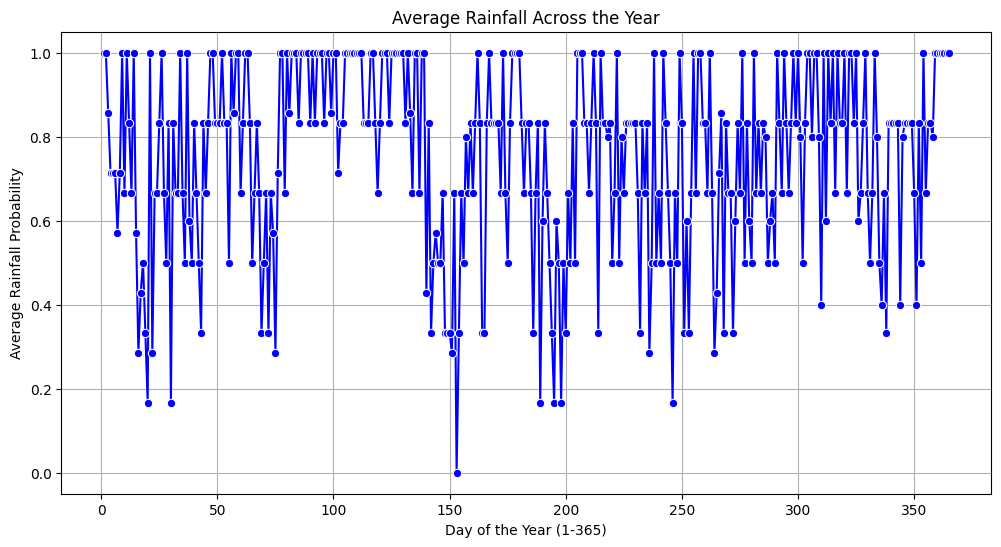

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by day and calculate average rainfall
rainfall_trend = train.groupby("day")["rainfall"].mean()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=rainfall_trend.index, y=rainfall_trend.values, marker="o", color="b")
plt.title("Average Rainfall Across the Year")
plt.xlabel("Day of the Year (1-365)")
plt.ylabel("Average Rainfall Probability")
plt.grid(True)
plt.show()


In [10]:

# Approximate mapping (assuming no leap year)
def get_month(day):
    if day <= 31: return "Jan"
    elif day <= 59: return "Feb"
    elif day <= 90: return "Mar"
    elif day <= 120: return "Apr"
    elif day <= 151: return "May"
    elif day <= 181: return "Jun"
    elif day <= 212: return "Jul"
    elif day <= 243: return "Aug"
    elif day <= 273: return "Sep"
    elif day <= 304: return "Oct"
    elif day <= 334: return "Nov"
    else: return "Dec"

# Create a new column for month
train["month"] = train["day"].apply(get_month)

# Convert to categorical type for correct ordering
train["month"] = pd.Categorical(train["month"], 
                             categories=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                         "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], 
                             ordered=True)


<ipython-input-11-0738aa9d4113>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_rainfall = train.groupby("month")["rainfall"].mean()
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


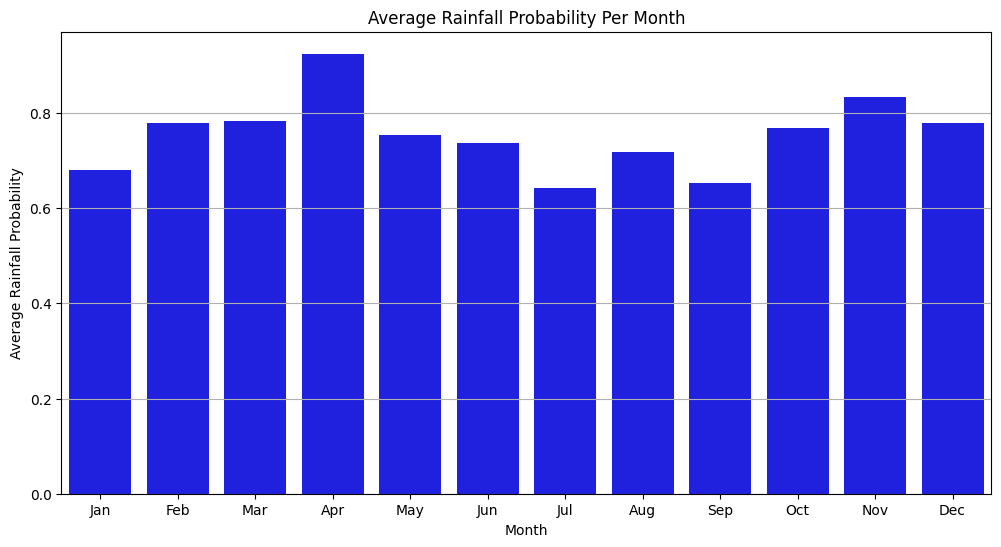

In [11]:


# Aggregate rainfall by month
monthly_rainfall = train.groupby("month")["rainfall"].mean()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_rainfall.index, y=monthly_rainfall.values, color="blue")
plt.title("Average Rainfall Probability Per Month")
plt.xlabel("Month")
plt.ylabel("Average Rainfall Probability")
plt.grid(axis="y")
plt.show()


In [12]:
train.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,month
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1,Jan
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1,Jan
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1,Jan
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1,Jan
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0,Jan


In [13]:
train.drop(columns=["month"], inplace=True)

In [14]:
train.shape

(2190, 13)

In [15]:
train.winddirection.unique()

array([ 60. ,  50. ,  70. ,  40. ,  20. ,  30. ,  80. ,  90. , 220. ,
       100. , 290. , 170. , 200. , 230. , 240. , 130. , 270. , 120. ,
       190. , 210. , 110. , 160. ,  10. , 180. , 280. , 250. , 300. ,
       260. ,  25. ,  75. , 150. , 140. ,  15. , 250.3,  65. ])

In [16]:
test_ids = test["id"].copy()
def preprocess_data(df):
    """
    Preprocesses the given DataFrame by encoding cyclical features,
    generating rolling averages (for training), and handling missing values.

    Parameters:
    df (pd.DataFrame): The input dataset.
    is_train (bool): Whether this is the training dataset.

    Returns:
    pd.DataFrame: The processed dataset.
    """
    df = df.copy()  # Avoid modifying the original DataFrame

    # Encode cyclical day and wind direction
    df["day_sin"] = np.sin(2 * np.pi * df["day"] / 365)
    df["day_cos"] = np.cos(2 * np.pi * df["day"] / 365)
    df['wind_sin'] = np.sin(2 * np.pi * df['winddirection'] / 360)
    df['wind_cos'] = np.cos(2 * np.pi * df['winddirection'] / 360)

    

    df['humidity_7d_avg'] = df['humidity'].rolling(window=7).mean()

    # Fill missing values
    df.fillna(method="bfill", inplace=True)

    # Drop unnecessary columns
    drop_cols = ["day", "winddirection"]  # Always drop these
    if 'id' in df.columns:
        drop_cols.append('id')  # Drop 'id' only for training
    df.drop(columns=drop_cols, inplace=True, errors="ignore")

    return df

# Apply preprocessing
train = preprocess_data(train)
test = preprocess_data(test)



<ipython-input-16-709884790c19>:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sin
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in cos
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-16-709884790c19>:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)


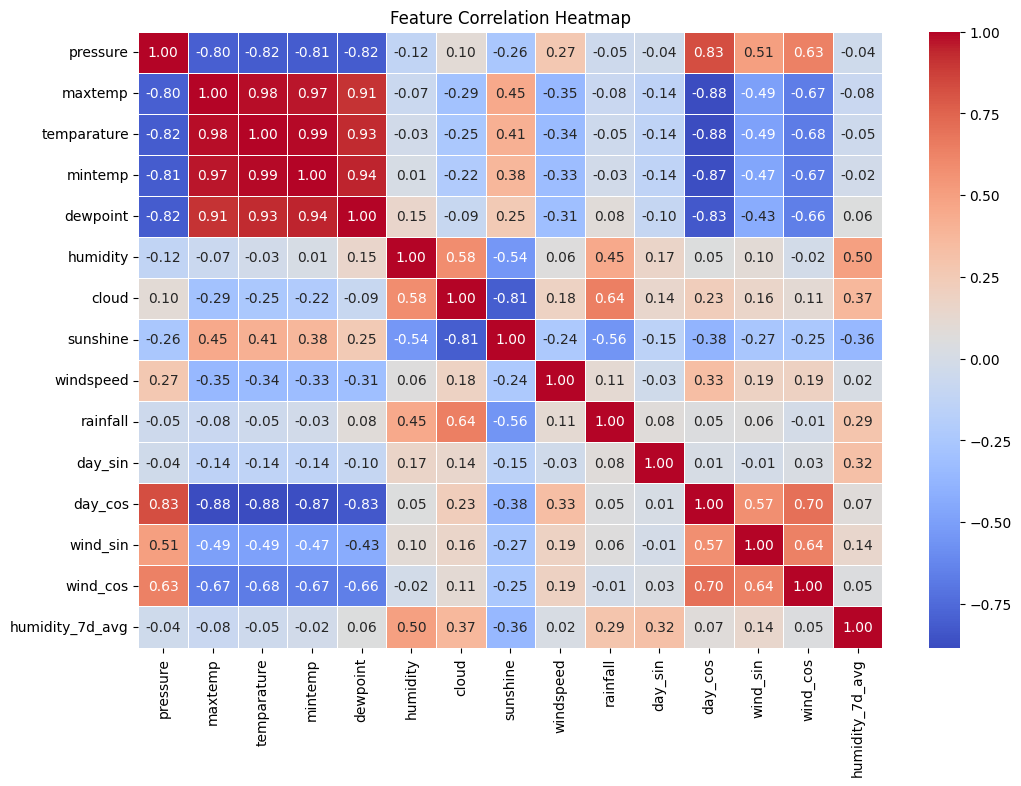

In [17]:


# Compute correlation matrix
corr_matrix = train.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [18]:
train.drop(columns=['tempreture','dewpoint'], inplace=True, errors="ignore")

In [19]:
from sklearn.model_selection import train_test_split


X = train.drop(columns=['rainfall'])  
y = train['rainfall']  


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}")
print(f"Target distribution in Train: {y_train.value_counts(normalize=True)}")
print(f"Target distribution in Validation: {y_val.value_counts(normalize=True)}")


Training set: (1752, 13), Validation set: (438, 13)
Target distribution in Train: rainfall
1    0.753425
0    0.246575
Name: proportion, dtype: float64
Target distribution in Validation: rainfall
1    0.753425
0    0.246575
Name: proportion, dtype: float64


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_val)


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks

# Define the model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer with feature count
    
    layers.Dense(256, kernel_regularizer=regularizers.l2(0.001)),  
    layers.BatchNormalization(),  # Normalization for better stability
    layers.Activation('swish'),  # Swish activation function
    layers.Dropout(0.3),  # Dropout to prevent overfitting

    layers.Dense(128, kernel_regularizer=regularizers.l2(0.001)),  
    layers.BatchNormalization(),
    layers.Activation('swish'),
    layers.Dropout(0.3),

    layers.Dense(64, kernel_regularizer=regularizers.l2(0.001)),  
    layers.BatchNormalization(),
    layers.Activation('swish'),

    layers.Dense(1, activation='sigmoid')  # Output layer (probability prediction)
])

# Learning rate scheduler
lr_scheduler = callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, factor=0.5, min_lr=1e-6, verbose=1)

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['AUC'])

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_val, y_val), 
                    callbacks=[lr_scheduler],
                    verbose=1)

# Predict probabilities on validation
y_val_pred = model.predict(X_val)[:, 0]  # Extract probability scores


Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - AUC: 0.7740 - loss: 0.7698 - val_AUC: 0.5000 - val_loss: 20.1205 - learning_rate: 0.0010
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8805 - loss: 0.6207 - val_AUC: 0.5000 - val_loss: 9.8184 - learning_rate: 0.0010
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8926 - loss: 0.5888 - val_AUC: 0.8256 - val_loss: 0.8698 - learning_rate: 0.0010
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8944 - loss: 0.5635 - val_AUC: 0.8508 - val_loss: 1.1235 - learning_rate: 0.0010
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8832 - loss: 0.5621 - val_AUC: 0.7105 - val_loss: 0.9841 - learning_rate: 0.0010
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8818 - loss: 0.5431 - val_AUC: 0.8347 - val_loss: 1.2886 - learning_rate: 0.0010
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8868 - loss: 0.5242 - val_AUC: 0.8658 - val_loss: 1.3319 - learning_rate: 0.0010
Epoch 8/100

In [21]:
y_val_pred

array([0.99957365, 0.5383258 , 0.67884123, 0.4895123 , 0.9505606 ,
       0.5974144 , 0.92585486, 0.8594481 , 0.9700157 , 0.9705888 ,
       0.8289247 , 0.50111175, 0.9009693 , 0.97117656, 0.9275325 ,
       0.10945316, 0.45400977, 0.9121069 , 0.9757651 , 0.6822771 ,
       0.8185316 , 0.9779848 , 0.9454084 , 0.9708483 , 0.81939167,
       0.9696467 , 0.7127195 , 0.89600605, 0.9436287 , 0.28937048,
       0.9962772 , 0.986378  , 0.9354752 , 0.05574686, 0.9030622 ,
       0.54025036, 0.92192936, 0.9448886 , 0.9989185 , 0.9175052 ,
       0.97434676, 0.9226609 , 0.9638065 , 0.7804228 , 0.5214622 ,
       0.9789004 , 0.9430085 , 0.97370386, 0.94726825, 0.99726427,
       0.93592596, 0.9654911 , 0.9988559 , 0.35233864, 0.2962687 ,
       0.2725894 , 0.7881433 , 0.84864396, 0.9345098 , 0.9552094 ,
       0.8916797 , 0.9530596 , 0.06289357, 0.969147  , 0.7287978 ,
       0.54235727, 0.33853838, 0.9885399 , 0.07309166, 0.988933  ,
       0.9414004 , 0.9388379 , 0.92136914, 0.2810044 , 0.97960

In [22]:
# Ensure test has the same columns as train
missing_cols = set(X_train.columns) - set(test.columns)
for col in missing_cols:
    test[col] = 0  # Fill missing columns in test with 0

# Ensure same column order
test = test[X_train.columns]

print(f"Train shape: {X_train.shape}, Test shape: {test.shape}")

Train shape: (1752, 13), Test shape: (730, 13)


In [23]:
y_test_pred = model.predict(test)  # Extract probability of rainfall (class 1)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [24]:
# Ensure test_ids is a 1D array
test_ids = test_ids.to_numpy().flatten()  # Works for Pandas Series

# Ensure y_test_pred is also a 1D array
y_test_pred = y_test_pred.flatten()  # Works for NumPy arrays

# Create submission DataFrame
submission = pd.DataFrame({
    'id': test_ids,  
    'rainfall': y_test_pred
})

# Save the submission file
submission.to_csv('submission.csv', index=False)

# Download the submission file in Kaggle
from IPython.display import FileLink
FileLink('submission.csv')


/kaggle/working/submission.csv